In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltc 
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt 
from tabulate import tabulate 

In [2]:
# read Iris data set

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
1 [4.9 3.0 1.4 0.2 'Iris-setosa']
2 [4.7 3.2 1.3 0.2 'Iris-setosa']
3 [4.6 3.1 1.5 0.2 'Iris-setosa']
4 [5.0 3.6 1.4 0.2 'Iris-setosa']
5 [5.4 3.9 1.7 0.4 'Iris-setosa']
6 [4.6 3.4 1.4 0.3 'Iris-setosa']
7 [5.0 3.4 1.5 0.2 'Iris-setosa']
8 [4.4 2.9 1.4 0.2 'Iris-setosa']
9 [4.9 3.1 1.5 0.1 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
11 [4.8 3.4 1.6 0.2 'Iris-setosa']
12 [4.8 3.0 1.4 0.1 'Iris-setosa']
13 [4.3 3.0 1.1 0.1 'Iris-setosa']
14 [5.8 4.0 1.2 0.2 'Iris-setosa']
15 [5.7 4.4 1.5 0.4 'Iris-setosa']
16 [5.4 3.9 1.3 0.4 'Iris-setosa']
17 [5.1 3.5 1.4 0.3 'Iris-setosa']
18 [5.7 3.8 1.7 0.3 'Iris-setosa']
19 [5.1 3.8 1.5 0.3 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
21 [5.1 3.7 1.5 0.4 'Iris-setosa']
22 [4.6 3.6 1.0 0.2 'Iris-setosa']
23 [5.1 3.3 1.7 0.5 'Iris-setosa']
24 [4.8 3.4 1.9 0.2 'Iris-setosa']
25 [5.0 3.0 1.6 0.2 'Iris-setosa']
26 [5.0 3.4 1.6 0.4 'Iris-setosa']
27 [5.2 3.5 1.5 0.2 'Iris-setosa']
28 [5.2 3.4 1.4 0.2 'Iris-seto

In [3]:
# get Iris classifications

IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


In [5]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

## Here, I will try two classes that are not linearly separable :

In [6]:
# Focus on classification of "versicolor" and "virginica", class indexes 1 and 2
# set to 1 and -1 in class array
cdx = np.array([1,2])   
# Focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

In [7]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

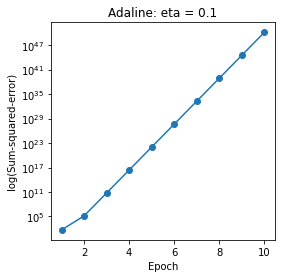

In [8]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('log(Sum-squared-error)')
ax.set_title('Adaline: eta = 0.1', fontsize ='large')
plt.show()

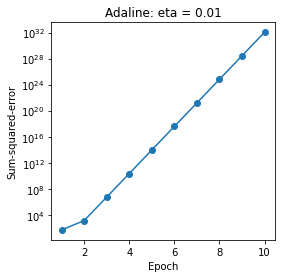

In [9]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='large')
plt.show()

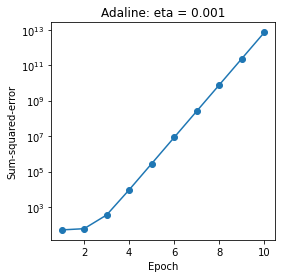

In [10]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='large')
plt.show()

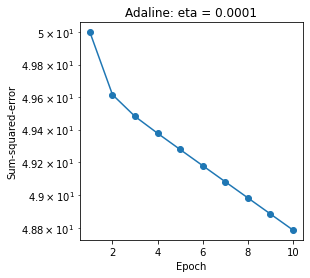

In [11]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='large')
plt.show()

In [12]:
# Standardize Inputs
# uses later on as well

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

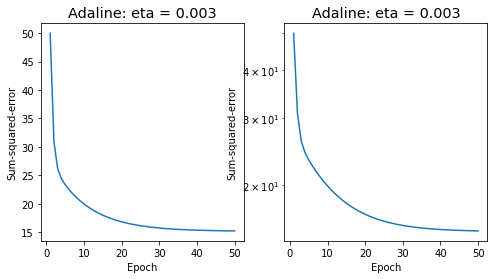

In [13]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='x-large')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='x-large')
plt.show()

In [14]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, label=IC[cdx[idx]])
                   

In [15]:
def dimen_second(feature_one, feature_two):
# Setting up dimens 
# here, for second dimension, using two features
    global cdx, Cl, IC, pltC, pltM, IrisF
    global twoFeature
    fdx = np.array([feature_one, feature_two]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 2))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        i += 1
        
    # Standardize the inputs
    # 0,1
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

    # Create Adaline (50 iterations)
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)
   
    # Plot the graph
    plt.close('all')
    plot_decision_regions(NF_Std, NC, classifier = ada)
    plt.title('Adaline - Gradient Descent', fontsize='large')
    # using large for fontsize
    plt.xlabel(str(IrisF[feature_one])) #fix the label
    plt.ylabel(str(IrisF[feature_two])) #fix the label
    plt.legend(loc='upper left', fontsize='large')
    plt.show()
    twoFeature.append((ada.accuracy(NF_Std, NC)*100))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

# Here, we will do the following which is to standardize the inputs to have the following two options :
 ##        -  make the training faster  
 ##        -  avoid getting struck from local optima

In [16]:
def dimen_three(feature_one, feature_two, feature_three):
# Now, including three features 
    global cdx, Cl, IC, pltC, pltM, IrisF
    global threeFeature
    fdx = np.array([feature_one, feature_two, feature_three]) 

    # from above
    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 3))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1
        i += 1

    # Standardize the inputs
    # 0,1,2
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
    
    # Create Adaline
    # 50 iterations, eta is 0.003
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)
    
    threeFeature.append(((ada.accuracy(NF_Std, NC)*100)))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

In [17]:
def dimen_fourth(feature_one, feature_two, feature_three, feature_four):
    global cdx, Cl, IC, pltC, pltM, IrisF
    global fourFeature
    fdx = np.array([feature_one, feature_two, feature_three, feature_four]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 4))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1
        i += 1
        
    # Standardize Inputs
    # 0,1,2,3
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
    NF_Std[:,3] = (NF[:,3] - NF[:,3].mean()) / NF[:,3].std()


    # Create Adaline
    # 50 iterations and eta=0.003
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)
    
    fourFeature.append(((ada.accuracy(NF_Std, NC)*100)))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

###  Used 50 iterations and the learning rate is 0.003. If numbers are changed drastically, can cause a huge error in every epoch.

# All six cases of using two features at a time:

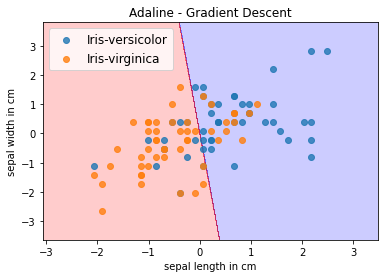

Adaline Accuracy Level: 75.0%


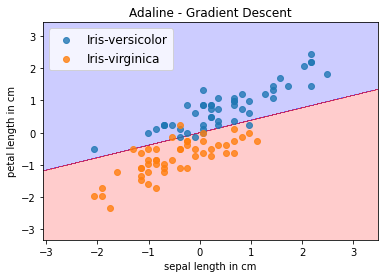

Adaline Accuracy Level: 94.0%


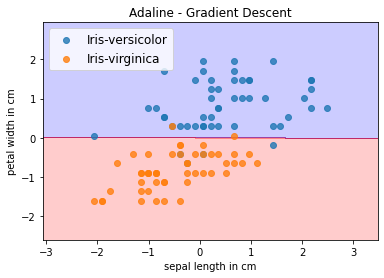

Adaline Accuracy Level: 94.0%


In [18]:
# Iris feature labels use come into play now

twoFeature_description = []
twoFeature = [];

# will do (0,1), (0,2) and (0,3)

# Here, dealing with sepal length and sepal width
twoFeature_description.append("Sepal Length & Sepal Width")
dimen_second(0,1)

# Here, dealing with sepal length and petal length
twoFeature_description.append("Sepal Length & Petal Length")
dimen_second(0,2)

# Here, dealing with sepal length and petal width
twoFeature_description.append("Sepal Length & Petal Width")
dimen_second(0,3)

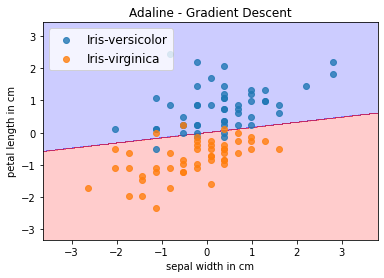

Adaline Accuracy Level: 93.0%


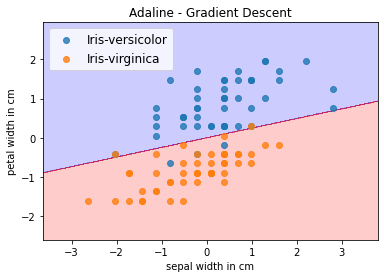

Adaline Accuracy Level: 95.0%


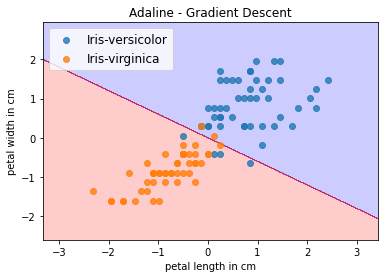

Adaline Accuracy Level: 94.0%


In [19]:
# Here, dealing with sepal width and petal length (1,2)
twoFeature_description.append("Sepal Width & Petal Length")
dimen_second(1,2)

# Here, dealing with sepal width and petal width (1,3)
twoFeature_description.append("Sepal Width & Petal Width")
dimen_second(1,3)

# Here, dealing with petal length and petal width (2,3)
twoFeature_description.append("Petal Length & Petal Width")
dimen_second(2,3)

In [20]:
twoFeature
# will list out the accuracy level results

[75.0, 94.0, 94.0, 93.0, 95.0, 94.0]

## When calculating the average of the results: 75+94+94+93+95+94, I get 545 which I divide by 6 to get 90.83333 which is approximately 90.8%. As can see, with the first case, the accuracy level is 75% which is the worst and due to this, the overall average goes down. If the first case is excluded, we get 94+94+93+95+94 = 470 and divide that by 5 to get 94%. The average would go up to 94%

# All four cases of using three features at a time:

In [21]:
threeFeature = []
threeFeature_description = []

# Now, dealing with three features 
# for (0,1,2), we are dealing with: Sepal Length, Sepal Width, Petal Length
threeFeature_description.append("Sepal Length, Sepal Width, Petal Length")
dimen_three(0,1,2)
# now, for (1,2,3), we are dealing with: Sepal Width, Petal Length, Petal Width
threeFeature_description.append("Sepal Width, Petal Length, Petal Width")
dimen_three(1,2,3)
# now, for (0,2,3), we are dealing with: Sepal Length, Petal Length, Petal Width
threeFeature_description.append("Sepal Length, Petal Length, Petal Width")
dimen_three(0,2,3)
# now, for (0,1,3), we are dealing with: Sepal Length, Sepal Width, Petal Width
threeFeature_description.append("Sepal Length, Sepal Width, Petal Width")
dimen_three(0,1,3)

Adaline Accuracy Level: 93.0%
Adaline Accuracy Level: 96.0%
Adaline Accuracy Level: 96.0%
Adaline Accuracy Level: 95.0%


In [22]:
threeFeature
# accuracy levels for the 4 cases

[93.0, 96.0, 96.0, 95.0]

## On an average, the accuracy is 95% which I get by adding 93+96+96+95 which gives 380 and dividing that by 4 gives 95%. Taking the last three results and leaving out the first case will make the average increase. This was also similar to what happened with the case with twoFeature. This lets us conclude that there is a correlation between threeFeature and twoFeature. From this four cases, we can learn that increasing the feature also increased the accuracy.

# The one case of using all features at once:

In [23]:
# will use all the features now
fourFeature = []
fourFeature_description = []
# Here, we will have: Sepal Length, Sepal Width, Petal Length, Petal Width

fourFeature_description.append("Sepal Length, Sepal Width, Petal Length, Petal Width")
dimen_fourth(0,1,2,3)

Adaline Accuracy Level: 97.0%


In [24]:
fourFeature
# accuracy level for one case of using all features at once

[97.0]

## Increasing features will improve accuracy level.

# Conclusion:

## Based on the results, and comparing both Iris-Virginica and Iris-Versicolor, I come to the conlusion that increasing the amount of features will make the accuracy level better. In my work, fourFeature had the best accuracy level (the highest one) which was 97%. The worst accuracy level was the first one for the six case, where it was 75%. Therefore, from this information, I can deduce that including more dimensions does help when trying to classify the data in this dataset.

In [25]:
# I have added all my accuracy results in a table for all 11 cases
data = [("75%", "93%", "97%"),
        ("94%", "96%"), 
        ("94%", "96%"), 
        ("93%", "95%"),
        ("95%", "", ""),
        ("94%", "", "")]

headers = ["Six Cases","Four Cases" ,"One Case"]

print(tabulate(data, headers=headers, tablefmt= "fancy_grid"))

╒═════════════╤══════════════╤════════════╕
│ Six Cases   │ Four Cases   │ One Case   │
╞═════════════╪══════════════╪════════════╡
│ 75%         │ 93%          │ 97%        │
├─────────────┼──────────────┼────────────┤
│ 94%         │ 96%          │            │
├─────────────┼──────────────┼────────────┤
│ 94%         │ 96%          │            │
├─────────────┼──────────────┼────────────┤
│ 93%         │ 95%          │            │
├─────────────┼──────────────┼────────────┤
│ 95%         │              │            │
├─────────────┼──────────────┼────────────┤
│ 94%         │              │            │
╘═════════════╧══════════════╧════════════╛


## For this assignment, I collaborated with Hafsa Nadim